# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
from statistics import mean

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest cty for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    units = "metric"
    city_url = f'{url}&appid={weather_api_key}&q={cities[i]}&units={units}'
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

#         Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atafu village
Processing Record 2 of Set 1 | saldanha
Processing Record 3 of Set 1 | ziro
Processing Record 4 of Set 1 | olonkinbyen
Processing Record 5 of Set 1 | whitehorse
Processing Record 6 of Set 1 | talnakh
Processing Record 7 of Set 1 | abraham's bay
City not found. Skipping...
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | ghanzi
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | pointe-noire
Processing Record 12 of Set 1 | rabigh
Processing Record 13 of Set 1 | alofi
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | minas de marcona
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | longyearbyen
Processing Record 19 of Set 1 | urengoy
Processing Record 20 of Set 1 | luderitz
Processing Record 21 of Set 1 | island harbour
Processing Record 22 of Se

Processing Record 38 of Set 4 | iskateley
Processing Record 39 of Set 4 | coquimbo
Processing Record 40 of Set 4 | corona de tucson
Processing Record 41 of Set 4 | ouellah
City not found. Skipping...
Processing Record 42 of Set 4 | santa ana de yacuma
Processing Record 43 of Set 4 | berdigestyakh
Processing Record 44 of Set 4 | serhiyivka
Processing Record 45 of Set 4 | hermanus
Processing Record 46 of Set 4 | flin flon
Processing Record 47 of Set 4 | chateau-du-loir
Processing Record 48 of Set 4 | selfoss
Processing Record 49 of Set 4 | kant
Processing Record 0 of Set 5 | nova vicosa
Processing Record 1 of Set 5 | gadzhiyevo
Processing Record 2 of Set 5 | hasaki
Processing Record 3 of Set 5 | alesund
Processing Record 4 of Set 5 | arawa
Processing Record 5 of Set 5 | mahajanga
Processing Record 6 of Set 5 | tolanaro
Processing Record 7 of Set 5 | likasi
Processing Record 8 of Set 5 | soio
Processing Record 9 of Set 5 | biltine
Processing Record 10 of Set 5 | nashtarud
City not found. 

Processing Record 27 of Set 8 | qamdo
Processing Record 28 of Set 8 | espargos
City not found. Skipping...
Processing Record 29 of Set 8 | siwa oasis
Processing Record 30 of Set 8 | orzysz
Processing Record 31 of Set 8 | ungaran
Processing Record 32 of Set 8 | kasongo-lunda
Processing Record 33 of Set 8 | vuktyl
Processing Record 34 of Set 8 | sittwe
Processing Record 35 of Set 8 | kaohsiung
Processing Record 36 of Set 8 | vilyuchinsk
Processing Record 37 of Set 8 | soe
Processing Record 38 of Set 8 | maryville
Processing Record 39 of Set 8 | bubaque
Processing Record 40 of Set 8 | bunia
Processing Record 41 of Set 8 | zimatlan de alvarez
Processing Record 42 of Set 8 | willemstad
Processing Record 43 of Set 8 | valparaiso
Processing Record 44 of Set 8 | pontenure
Processing Record 45 of Set 8 | nampula
Processing Record 46 of Set 8 | harstad
Processing Record 47 of Set 8 | nagqu
Processing Record 48 of Set 8 | kievka
Processing Record 49 of Set 8 | mokhsogollokh
Processing Record 0 of

Processing Record 18 of Set 12 | touros
Processing Record 19 of Set 12 | boa vista
Processing Record 20 of Set 12 | chimbote
Processing Record 21 of Set 12 | bure
Processing Record 22 of Set 12 | dolores
Processing Record 23 of Set 12 | bayanhongor
Processing Record 24 of Set 12 | yigo village
Processing Record 25 of Set 12 | katutura
Processing Record 26 of Set 12 | vila velha
Processing Record 27 of Set 12 | le port
Processing Record 28 of Set 12 | tanki leendert
City not found. Skipping...
Processing Record 29 of Set 12 | rosario del tala
Processing Record 30 of Set 12 | wanning
Processing Record 31 of Set 12 | valley east
City not found. Skipping...
Processing Record 32 of Set 12 | fort mcmurray
Processing Record 33 of Set 12 | cwmafan
Processing Record 34 of Set 12 | bechar
Processing Record 35 of Set 12 | antonio enes
Processing Record 36 of Set 12 | soledad
Processing Record 37 of Set 12 | gotsucho
Processing Record 38 of Set 12 | shatsk
Processing Record 39 of Set 12 | sinazong

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atafu village,-8.5421,-172.5159,28.83,76,99,6.28,TK,1686528382
1,saldanha,-33.0117,17.9442,14.69,86,88,5.26,ZA,1686528493
2,ziro,27.6333,93.8333,14.97,99,99,0.21,IN,1686528493
3,olonkinbyen,70.9221,-8.7187,1.08,90,100,5.65,SJ,1686528494
4,whitehorse,60.7161,-135.0538,14.45,38,100,8.23,CA,1686528350


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atafu village,-8.5421,-172.5159,28.83,76,99,6.28,TK,1686528382
1,saldanha,-33.0117,17.9442,14.69,86,88,5.26,ZA,1686528493
2,ziro,27.6333,93.8333,14.97,99,99,0.21,IN,1686528493
3,olonkinbyen,70.9221,-8.7187,1.08,90,100,5.65,SJ,1686528494
4,whitehorse,60.7161,-135.0538,14.45,38,100,8.23,CA,1686528350


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

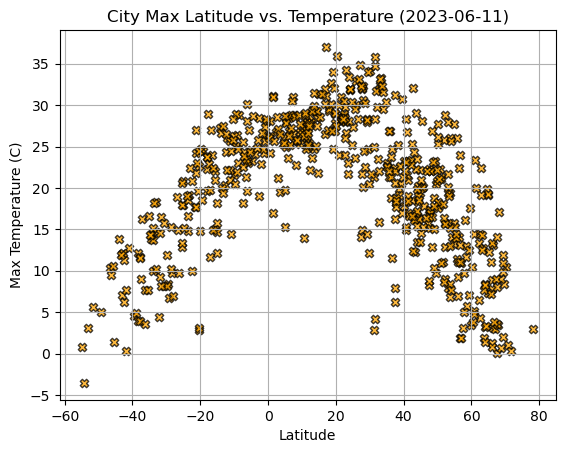

In [9]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
tempreture = city_data_df["Max Temp"]
date = str(datetime.fromtimestamp(city_data_df["Date"][0])).split()[0]
plt.scatter(latitude, tempreture, color="orange", marker="X",
            edgecolors="black", alpha=0.75,)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

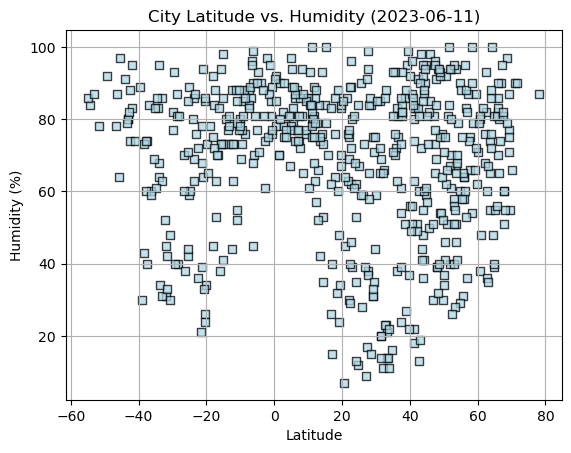

In [10]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df["Humidity"]
plt.scatter(latitude, humidity, color="lightblue", marker="s",
            edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

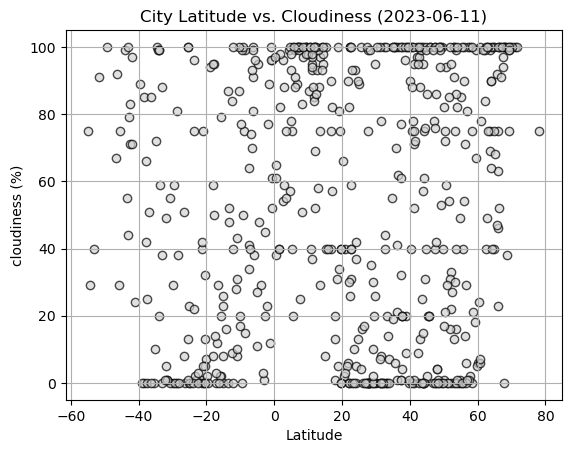

In [11]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df["Cloudiness"]
plt.scatter(latitude, cloudiness, color="lightgrey", marker="o", 
            edgecolors="black", alpha=0.70)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

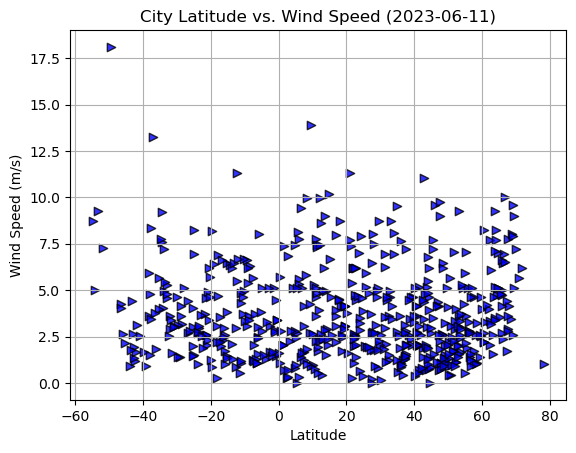

In [12]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df["Wind Speed"]
plt.scatter(latitude, wind_speed, color="blue", marker=">",
           edgecolors="black",alpha=0.80)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def Linear_Regression_plots(x,y, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    print(f'The r-value is: {rvalue}')
    regress_values = x*slope+intercept
    plt.scatter(x,y)
    plt.plot(x,regress_values, "r-")
    line_eq = "y = " + str(round(slope, 2)) +"x + " + str(round(intercept,2))
    plt.xlabel("Latitude")
    plt.ylabel(f"{ylabel}")
    if rvalue >= 0.25:
        plt.annotate(line_eq, xy=(max(x)-35,max(regress_values)-mean(regress_values))
                 , fontsize=15, color="red")
    elif rvalue <= -0.25:
         plt.annotate(line_eq, xy=(min(x)+5,max(regress_values)-mean(regress_values))
                 , fontsize=15, color="red")
    else:
        plt.annotate(line_eq, xy=(mean(x), mean(regress_values)+5)
                 , fontsize=15, color="red")
        
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ziro,27.6333,93.8333,14.97,99,99,0.21,IN,1686528493
3,olonkinbyen,70.9221,-8.7187,1.08,90,100,5.65,SJ,1686528494
4,whitehorse,60.7161,-135.0538,14.45,38,100,8.23,CA,1686528350
5,talnakh,69.4865,88.3972,8.45,55,100,5.09,RU,1686528339
6,iqaluit,63.7506,-68.5145,1.85,74,75,9.26,CA,1686528494


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atafu village,-8.5421,-172.5159,28.83,76,99,6.28,TK,1686528382
1,saldanha,-33.0117,17.9442,14.69,86,88,5.26,ZA,1686528493
7,ghanzi,-21.5667,21.7833,17.68,21,1,3.73,BW,1686528495
9,pointe-noire,-4.7761,11.8635,23.30,93,95,2.78,CG,1686528495
11,alofi,-19.0595,-169.9187,24.49,78,94,6.41,NU,1686528496


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.721785053940017


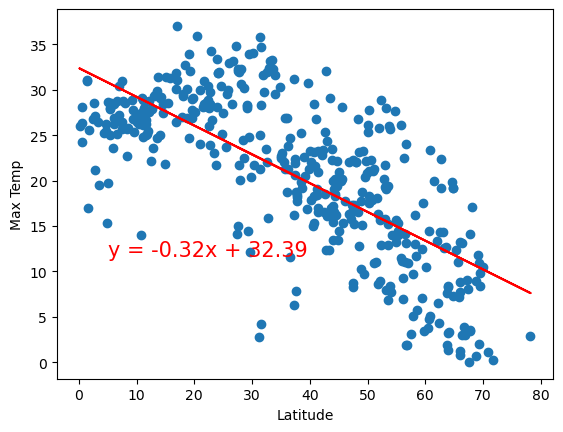

In [16]:
# Linear regression on Northern Hemisphere
N_Lat = northern_hemi_df["Lat"]
N_Temp = northern_hemi_df["Max Temp"]
S_ylabel = "Max Temp"
Linear_Regression_plots(N_Lat, N_Temp, S_ylabel)

The r-value is: 0.8218847995019909


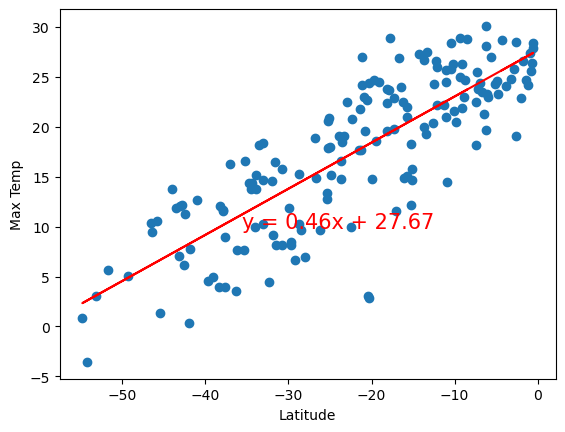

In [17]:
# Linear regression on Southern Hemisphere
S_Lat = southern_hemi_df["Lat"]
S_Temp = southern_hemi_df["Max Temp"]
S_ylabel = "Max Temp"
Linear_Regression_plots(S_Lat, S_Temp, S_ylabel)

**Discussion about the linear relationship:** 
As we see in these two graphs, we see a rise in temperature in the southern hemisphere as our cities get closer to the Equator and once we cross to the nothern hamisphere, the tempereture drops as we go further towards the northern cities. This concludes that, the closer a city coordinances is to the Equator line, the warmer the weather.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.0495446554431361


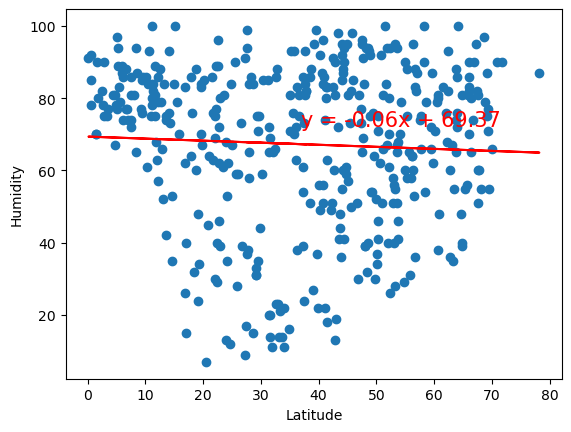

In [18]:
# Northern Hemisphere
N_Humidity = northern_hemi_df["Humidity"]
N_ylabel = "Humidity"
Linear_Regression_plots(N_Lat, N_Humidity, N_ylabel)

The r-value is: 0.14707987654402654


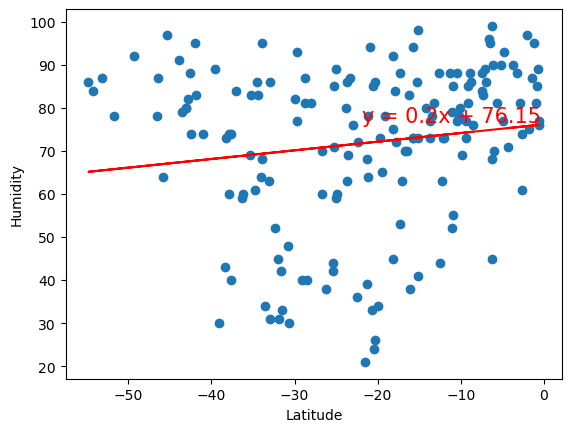

In [19]:
# Southern Hemisphere
S_Humidity = southern_hemi_df["Humidity"]
S_ylabel = "Humidity"
Linear_Regression_plots(S_Lat, S_Humidity, S_ylabel)

**Discussion about the linear relationship:** Humidity does not change much as cities get closer to the Equator. However, the pattern of increse and decrease seems to be similiar with tempreture, as humidity also rises when our cities tend to get closer to earths middle line.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.04923254003836775


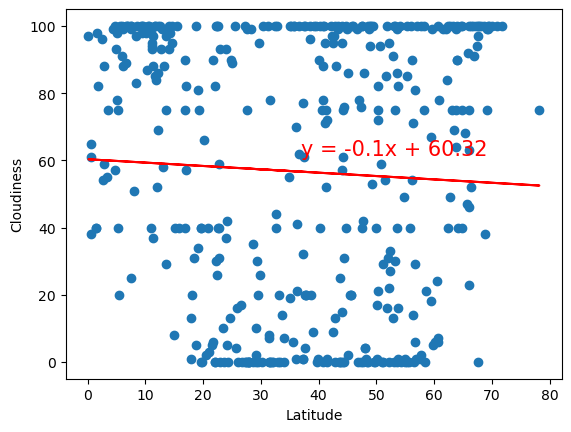

In [20]:
# Northern Hemisphere
N_cloudiness = northern_hemi_df["Cloudiness"]
N_ylabel = "Cloudiness"
Linear_Regression_plots(N_Lat, N_cloudiness, N_ylabel)

The r-value is: -0.025808114267110105


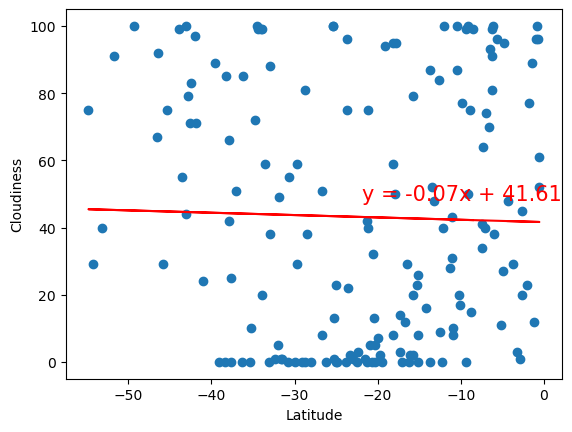

In [21]:
# Southern Hemisphere
S_cloudiness = southern_hemi_df["Cloudiness"]
S_ylabel = "Cloudiness"
Linear_Regression_plots(S_Lat, S_cloudiness, S_ylabel)

**Discussion about the linear relationship:** As we see from the r-value, the cloudiness seems not to have much change, but as we can see from our data, the cloudiness change does not have any direct relation to the rise of Latitude in our coordinance. So we can conclude that, weather or not a city has much clouds or not, has not much to do with its coordinance. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.018407806666489095


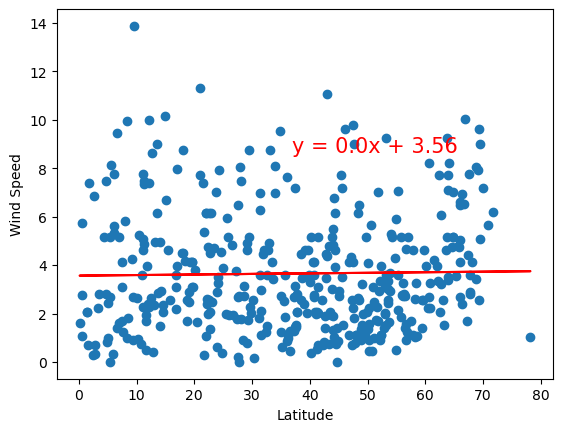

In [22]:
# Northern Hemisphere
N_wind_speed = northern_hemi_df["Wind Speed"]
N_ylabel = "Wind Speed"
Linear_Regression_plots(N_Lat, N_wind_speed, N_ylabel)

The r-value is: -0.20442806245435713


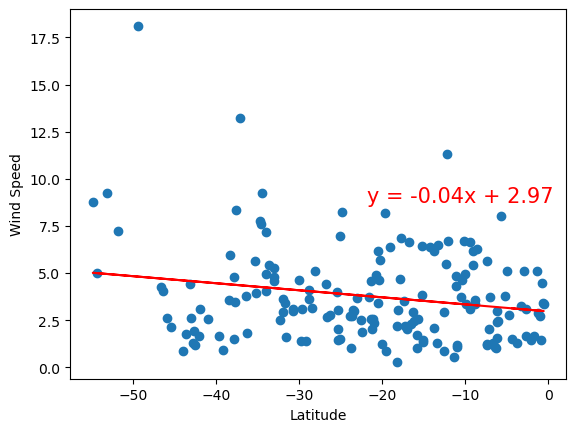

In [23]:
# Southern Hemisphere
S_wind_speed = southern_hemi_df["Wind Speed"]
S_ylabel = "Wind Speed"
Linear_Regression_plots(S_Lat, S_wind_speed, S_ylabel)

**Discussion about the linear relationship:** Like our findings on cloudiness of a city vs its Latitude, the speed of the wind in a city does not have much relation with it's Latitude. the data is scattered so irationally. 